In [1]:
import math 
import collections
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from datetime import datetime

from sklearn.model_selection import train_test_split
from sklearn.ensemble import IsolationForest
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

# 0. Data Exploration

In [2]:
dateparser = lambda x: datetime.strptime(x, '%d/%m/%Y %H:%M')
df = pd.read_csv("./data/KPIs sample 5 cells data_train.csv",
                 delimiter=";",
                 parse_dates=['index'],
                 date_parser=dateparser,
                 converters={"cell_id":str},
                 #index_col="index"
                 )
df.head()

,index,cell_id,DL_TRAFFIC_VOLUME,UL_TRAFFIC_VOLUME,Inter_X2_based_HO_prep,PDCP_SDU_Volume_DL,VoLTE_total_traffic,INTRA_FREQ_HO_SR_RATIO,RRC_SR_RATIO,Intra_eNB_HO_SR_total_RATIO,...,E_RAB_QCI1_DR_RATIO,DCR_LTE_RATIO,CSSR_LTE_RATIO,LTE_INTER_ENODEB_HOSR_RATIO,E_UTRAN_Inter_Freq_HO_SR_RATIO,Inter_RAT_HO_SR_GERAN_SRVCC_RATIO,Inter_RAT_Total_HO_SR_RATIO,E_UTRAN_tot_HO_SR_inter_eNB_X2_RATIO,DL_THROUGHPUT_RATIO,E_RAB_DR_RATIO
0,2021-05-09 00:00:00,2.2265366483183206e+17,3.779737e+10,3.947172e+09,15.0,3.779737e+10,4727.0,0.809859,0.992427,0.809859,...,0.000000,0.001761,0.996041,0.400000,0.770642,0.963636,0.963636,0.400000,82.550417,0.001761
1,2021-05-09 01:00:00,2.2265366483183206e+17,3.684898e+10,4.088752e+09,6.0,3.684898e+10,3076.0,0.886792,0.993288,0.886792,...,0.000000,0.002468,0.995465,0.500000,0.842105,1.000000,1.000000,0.500000,80.531811,0.002468
2,2021-05-09 02:00:00,2.2265366483183206e+17,3.292677e+10,5.016897e+09,8.0,3.292677e+10,3501.0,0.938356,0.994664,0.938356,...,0.013889,0.003077,0.996044,0.375000,0.931624,1.000000,0.966667,0.375000,71.885311,0.003077
3,2021-05-09 03:00:00,2.2265366483183206e+17,3.021547e+10,5.139107e+09,9.0,3.021547e+10,2275.0,0.860215,0.994819,0.860215,...,0.000000,0.001721,0.995920,0.777778,0.816901,0.947368,0.947368,0.777778,65.977430,0.001721
4,2021-05-09 04:00:00,2.2265366483183206e+17,3.082176e+10,4.250716e+09,17.0,3.082176e+10,2178.0,0.840426,0.995952,0.840426,...,0.000000,0.002213,0.995628,0.764706,0.794521,1.000000,1.000000,0.764706,67.324805,0.002213


In [3]:
# Check the number of records
len(df)

8280

In [5]:
# Check cell_id count
df["cell_id"].value_counts()

7.315874467898523e+16     1656
3.8447326973958944e+17    1656
2.2265366483183206e+17    1656
9.10621795573706e+16      1656
4.262775046883192e+17     1656
Name: cell_id, dtype: int64

## 0.1 Check null value 

In [3]:
def chechNull(df):
    print(df.isnull().sum(axis=0))

chechNull(df)

index                                                         0
cell_id                                                       0
DL_TRAFFIC_VOLUME                                            21
UL_TRAFFIC_VOLUME                                            21
Inter_X2_based_HO_prep                                     3313
PDCP_SDU_Volume_DL                                         3313
VoLTE_total_traffic                                        3313
INTRA_FREQ_HO_SR_RATIO                                       40
RRC_SR_RATIO                                                 28
Intra_eNB_HO_SR_total_RATIO                                3321
E_UTRAN_RRC_Conn_Stp_Failure_due_RRC_timer_expiry_RATIO    3313
CELL_AVAILABILITY_RATIO                                      20
RACH_Stp_Completion_SR_RATIO                               3313
Total_E_UTRAN_RRC_Conn_Stp_SR_RATIO                        3313
Inter_RAT_HO_SR_UTRAN_SRVCC_RATIO                          5595
UL_THROUGHPUT_RATIO                     

## 0.2 Check infinite values

In [4]:
def checkInfinite(df):
    # print out infinite value counts
    print("n_infinite \t feature_name")
    features = list(df.columns)
    features.remove("cell_id")
    for feature in features: 
        n_inf = np.isinf(df[feature]).sum()
        print(str(n_inf) + "\t\t" +feature)

        
# remove "index" and "cell_id"        
checkInfinite(df)

n_infinite 	 feature_name
0		index
0		DL_TRAFFIC_VOLUME
0		UL_TRAFFIC_VOLUME
0		Inter_X2_based_HO_prep
0		PDCP_SDU_Volume_DL
0		VoLTE_total_traffic
0		INTRA_FREQ_HO_SR_RATIO
0		RRC_SR_RATIO
0		Intra_eNB_HO_SR_total_RATIO
0		E_UTRAN_RRC_Conn_Stp_Failure_due_RRC_timer_expiry_RATIO
0		CELL_AVAILABILITY_RATIO
0		RACH_Stp_Completion_SR_RATIO
0		Total_E_UTRAN_RRC_Conn_Stp_SR_RATIO
1		Inter_RAT_HO_SR_UTRAN_SRVCC_RATIO
0		UL_THROUGHPUT_RATIO
0		E_RAB_QCI1_DR_RATIO
0		DCR_LTE_RATIO
0		CSSR_LTE_RATIO
0		LTE_INTER_ENODEB_HOSR_RATIO
0		E_UTRAN_Inter_Freq_HO_SR_RATIO
0		Inter_RAT_HO_SR_GERAN_SRVCC_RATIO
0		Inter_RAT_Total_HO_SR_RATIO
0		E_UTRAN_tot_HO_SR_inter_eNB_X2_RATIO
0		DL_THROUGHPUT_RATIO
0		E_RAB_DR_RATIO


In [5]:
# drop inf 
condition = df["Inter_RAT_HO_SR_UTRAN_SRVCC_RATIO"]==np.inf
df = df.drop(df[condition].index)

In [7]:
len(df)

8279

**Plot the distribution of each feature**

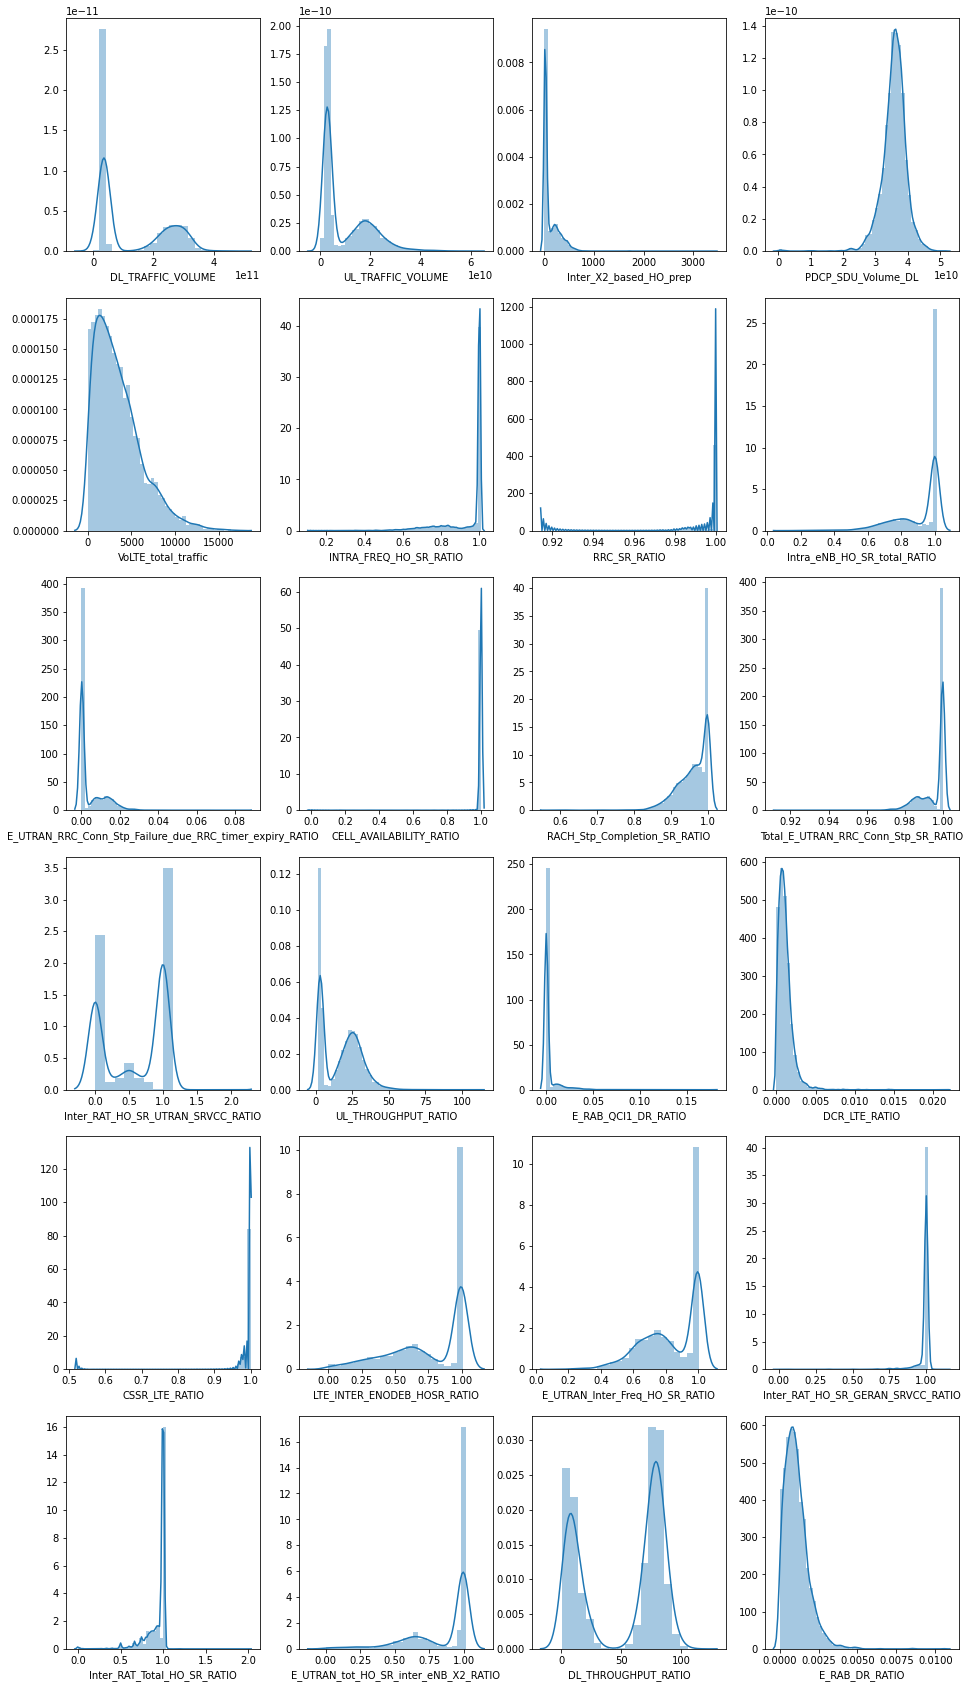

In [6]:
def get_fig_position(i,n_per_row):
        row = i/n_per_row
        col = i%n_per_row
        return int(row),int(col)
    

def showFeatureDistribution(df_features):
    """
    Input
    @df_features: a dataframe that contains the features to explore 
    """
    feature_names = df_features.columns
    feature_nb = len(feature_names)

    # plot the distribution of each feature
    n_per_row = 4
    n_rows = math.ceil(feature_nb/n_per_row)

    # plot hist
    fig,ax = plt.subplots(n_rows,n_per_row,figsize=[4*n_per_row,5*n_rows])
    for i,name in enumerate(feature_names):
        ix,iy = get_fig_position(i,n_per_row)
        axes = ax[ix][iy]
        feature = df_features[name].dropna()
        #axes.set_title(name)
        #axes.hist(feature)
        sns.distplot(feature,ax=axes)
    plt.show()

    
showFeatureDistribution(df.drop(["cell_id",'index'],axis=1))

## 0.3 Group data by cell_id

Check the null values in each dataframe

In [6]:
df.groupby('cell_id').describe()

DL_TRAFFIC_VOLUME                              \
                                   count          mean           std   
cell_id                                                                
2.2265366483183206e+17            1654.0  3.624713e+10  3.942532e+09   
3.8447326973958944e+17            1646.0  2.786553e+11  4.272544e+10   
4.262775046883192e+17             1654.0  3.696596e+10  2.515512e+09   
7.315874467898523e+16             1655.0  3.411462e+10  3.994520e+09   
9.10621795573706e+16              1649.0  2.516214e+11  4.653625e+10   

                                                                  \
                                 min           25%           50%   
cell_id                                                            
2.2265366483183206e+17  1.841076e+10  3.377921e+10  3.613497e+10   
3.8447326973958944e+17  0.000000e+00  2.561587e+11  2.882953e+11   
4.262775046883192e+17   1.090273e+10  3.550302e+10  3.704870e+10   
7.315874467898523e+16   2.633089e+08  3.264606e+10  3.479859e+10   
9.10621795573706e+16    0.000000e+00  2.256967e+11  2.502591e+11   

                                                   UL_TRAFFIC_VOLUME  \
                                 75%           max             count   
cell_id                                                                
2.2265366483183206e+17  3.860277e+10  5.126918e+10            1654.0   
3.8447326973958944e+17  3.076379e+11  4.081824e+11            1646.0   
4.262775046883192e+17   3.845742e+10  4.571684e+10            1654.0   
7.315874467898523e+16   3.649989e+10  4.112292e+10            1655.0   
9.10621795573706e+16    2.759512e+11  4.635228e+11            1649.0   

                                      ... DL_THROUGHPUT_RATIO              \
                                mean  ...                 75%         max   
cell_id                               ...                                   
2.2265366483183206e+17  3.401886e+09  ...           84.342279  111.745089   
3.8447326973958944e+17  1.874498e+10  ...           17.759667   82.403812   
4.262775046883192e+17   3.158482e+09  ...           83.960433   99.605287   
7.315874467898523e+16   2.410926e+09  ...           79.568965   89.509330   
9.10621795573706e+16    2.079526e+10  ...            9.403942   82.403812   

                       E_RAB_DR_RATIO                                          \
                                count      mean       std       min       25%   
cell_id                                                                         
2.2265366483183206e+17         1654.0  0.001647  0.000838  0.000132  0.001063   
3.8447326973958944e+17            1.0  0.000799       NaN  0.000799  0.000799   
4.262775046883192e+17          1654.0  0.001027  0.000487  0.000000  0.000693   
7.315874467898523e+16          1655.0  0.000547  0.000509  0.000000  0.000196   
9.10621795573706e+16              1.0  0.000799       NaN  0.000799  0.000799   

                                                      
                             50%       75%       max  
cell_id                                               
2.2265366483183206e+17  0.001511  0.002068  0.010546  
3.8447326973958944e+17  0.000799  0.000799  0.000799  
4.262775046883192e+17   0.000974  0.001301  0.004401  
7.315874467898523e+16   0.000443  0.000765  0.008607  
9.10621795573706e+16    0.000799  0.000799  0.000799  

[5 rows x 192 columns]

# 1. Data preprocessing

Fill the null values with mean of each column

## 1.1 Add 'hour' as a feature

In [7]:
def getHour(x:datetime):
    return int(x.hour)
df["HOUR"] = df['index'].map(getHour)
df[['index','HOUR']]

,index,HOUR
0,2021-05-09 00:00:00,0
1,2021-05-09 01:00:00,1
2,2021-05-09 02:00:00,2
3,2021-05-09 03:00:00,3
4,2021-05-09 04:00:00,4
...,...,...
8275,2021-07-16 19:00:00,19
8276,2021-07-16 20:00:00,20
8277,2021-07-16 21:00:00,21
8278,2021-07-16 22:00:00,22


## 1.2 Separate by Cells
Separate data by their cell_id

In [21]:
cell_ids = df["cell_id"].unique()

# A list of dataframe of different cell_id
list_cells = []
for i in range(len(cell_ids)):
    cell_id = cell_ids[i]
    list_cells.append(df[df["cell_id"]==cell_id])

# 2. Feature Selection

## 2.1 Drop useless features
Delete columns with too many NaN values

In [9]:
def checkNullOfEach(list_cells):
    for i in range(len(cell_ids)):
        df_cell = list_cells[i].drop("cell_id",axis=1)
        n_feature = len(df_cell.columns)
        print("="*65)
        print(f"Cell Id: {cell_ids[i]}")
        print(f"Number of features:{n_feature},\t Number of data: {len(df_cell)}")
        print("-  "*22)
        chechNull(df_cell)
        print()
        
checkNullOfEach(list_cells)

Cell Id: 2.2265366483183206e+17
Number of features:26,	 Number of data: 1655
-  -  -  -  -  -  -  -  -  -  -  -  -  -  -  -  -  -  -  -  -  -  
index                                                        0
DL_TRAFFIC_VOLUME                                            1
UL_TRAFFIC_VOLUME                                            1
Inter_X2_based_HO_prep                                       1
PDCP_SDU_Volume_DL                                           1
VoLTE_total_traffic                                          1
INTRA_FREQ_HO_SR_RATIO                                       1
RRC_SR_RATIO                                                 1
Intra_eNB_HO_SR_total_RATIO                                  1
E_UTRAN_RRC_Conn_Stp_Failure_due_RRC_timer_expiry_RATIO      1
CELL_AVAILABILITY_RATIO                                      1
RACH_Stp_Completion_SR_RATIO                                 1
Total_E_UTRAN_RRC_Conn_Stp_SR_RATIO                          1
Inter_RAT_HO_SR_UTRAN_SRVCC_RATIO    

In [12]:
def nullPercentage(s):
    return s.isnull().sum()/len(s)
    
def dropUselessColumns(df,threshold=0.6):
    """
    Drop columns with too many nan values
    
    Input:
    @df
    @threshold: The max null values percentage to keep a column.
    """
    columns_to_drop = []
    for col in df.columns:
        if nullPercentage(df[col]) >= threshold:
            columns_to_drop.append(col)
    return df.drop(columns_to_drop,axis=1)    

In [22]:
# Drop the useless columns
list_cells = list(map(dropUselessColumns,list_cells))

# Recheck the null 
checkNullOfEach(list_cells)

Cell Id: 2.2265366483183206e+17
Number of features:26,	 Number of data: 1655
-  -  -  -  -  -  -  -  -  -  -  -  -  -  -  -  -  -  -  -  -  -  
index                                                        0
DL_TRAFFIC_VOLUME                                            1
UL_TRAFFIC_VOLUME                                            1
Inter_X2_based_HO_prep                                       1
PDCP_SDU_Volume_DL                                           1
VoLTE_total_traffic                                          1
INTRA_FREQ_HO_SR_RATIO                                       1
RRC_SR_RATIO                                                 1
Intra_eNB_HO_SR_total_RATIO                                  1
E_UTRAN_RRC_Conn_Stp_Failure_due_RRC_timer_expiry_RATIO      1
CELL_AVAILABILITY_RATIO                                      1
RACH_Stp_Completion_SR_RATIO                                 1
Total_E_UTRAN_RRC_Conn_Stp_SR_RATIO                          1
Inter_RAT_HO_SR_UTRAN_SRVCC_RATIO    

cell id : 2.2265366483183206e+17


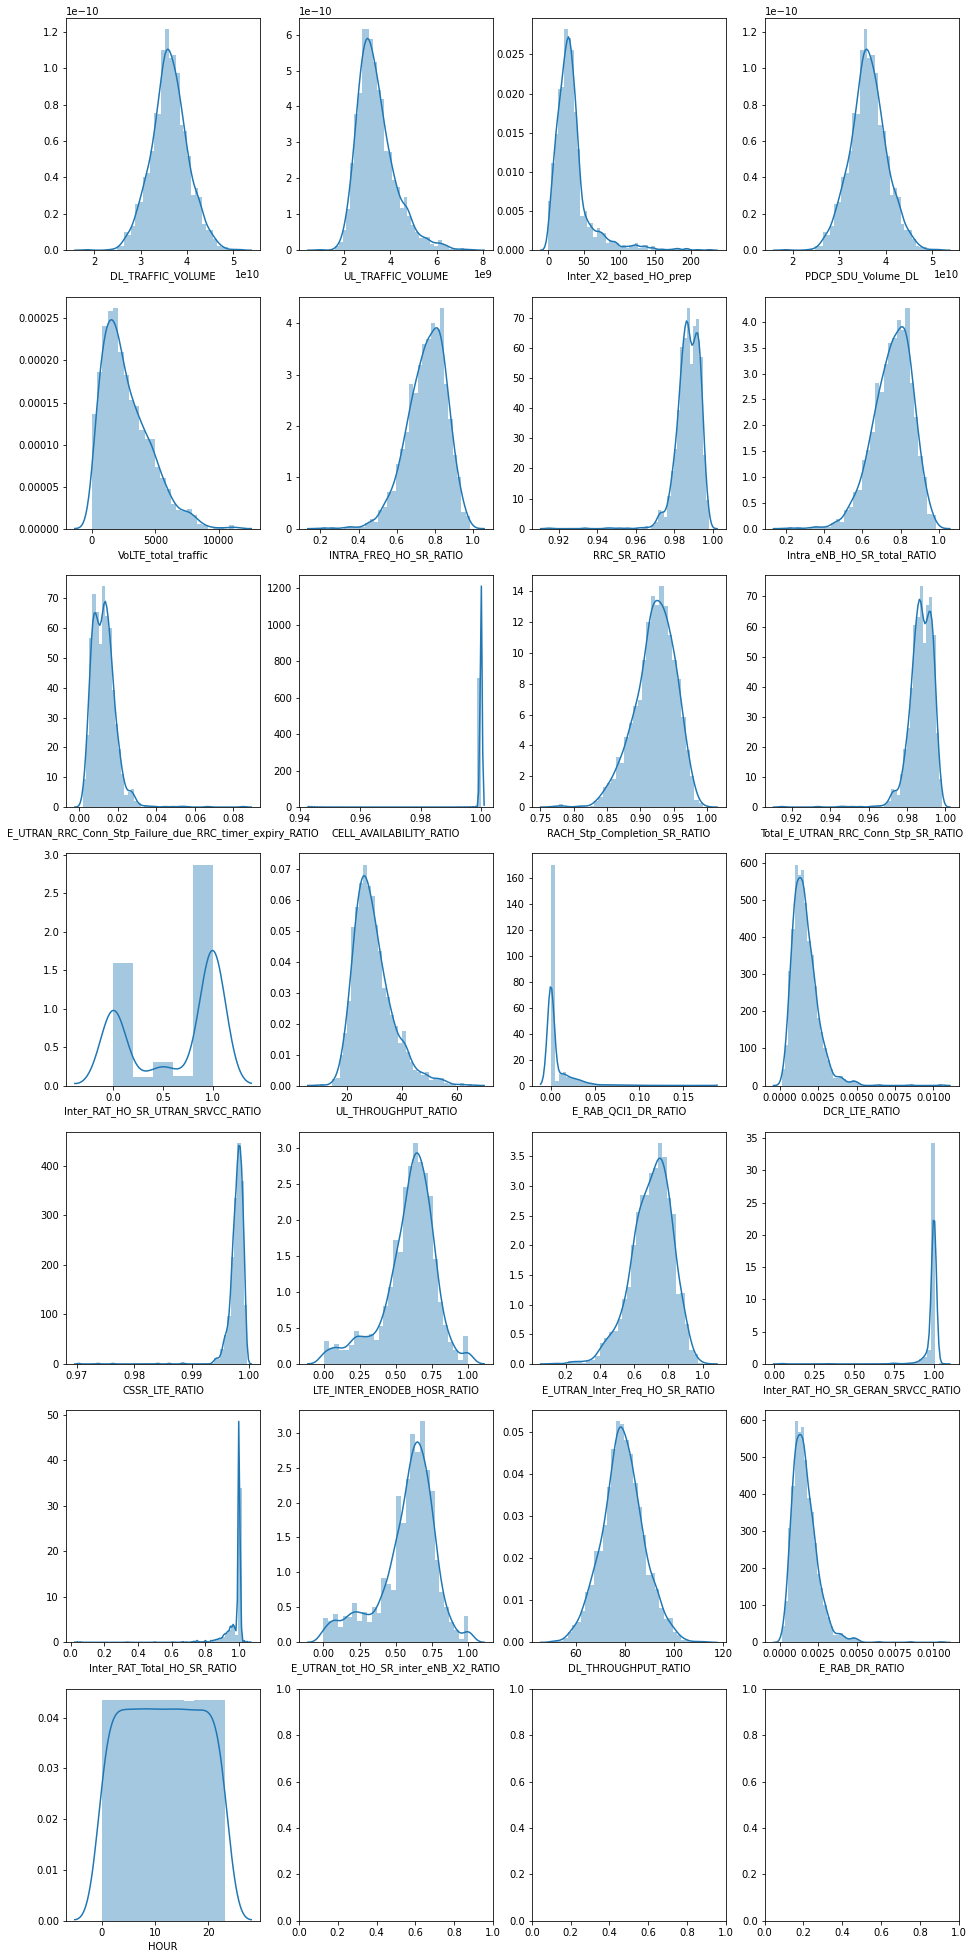






cell id : 7.315874467898523e+16


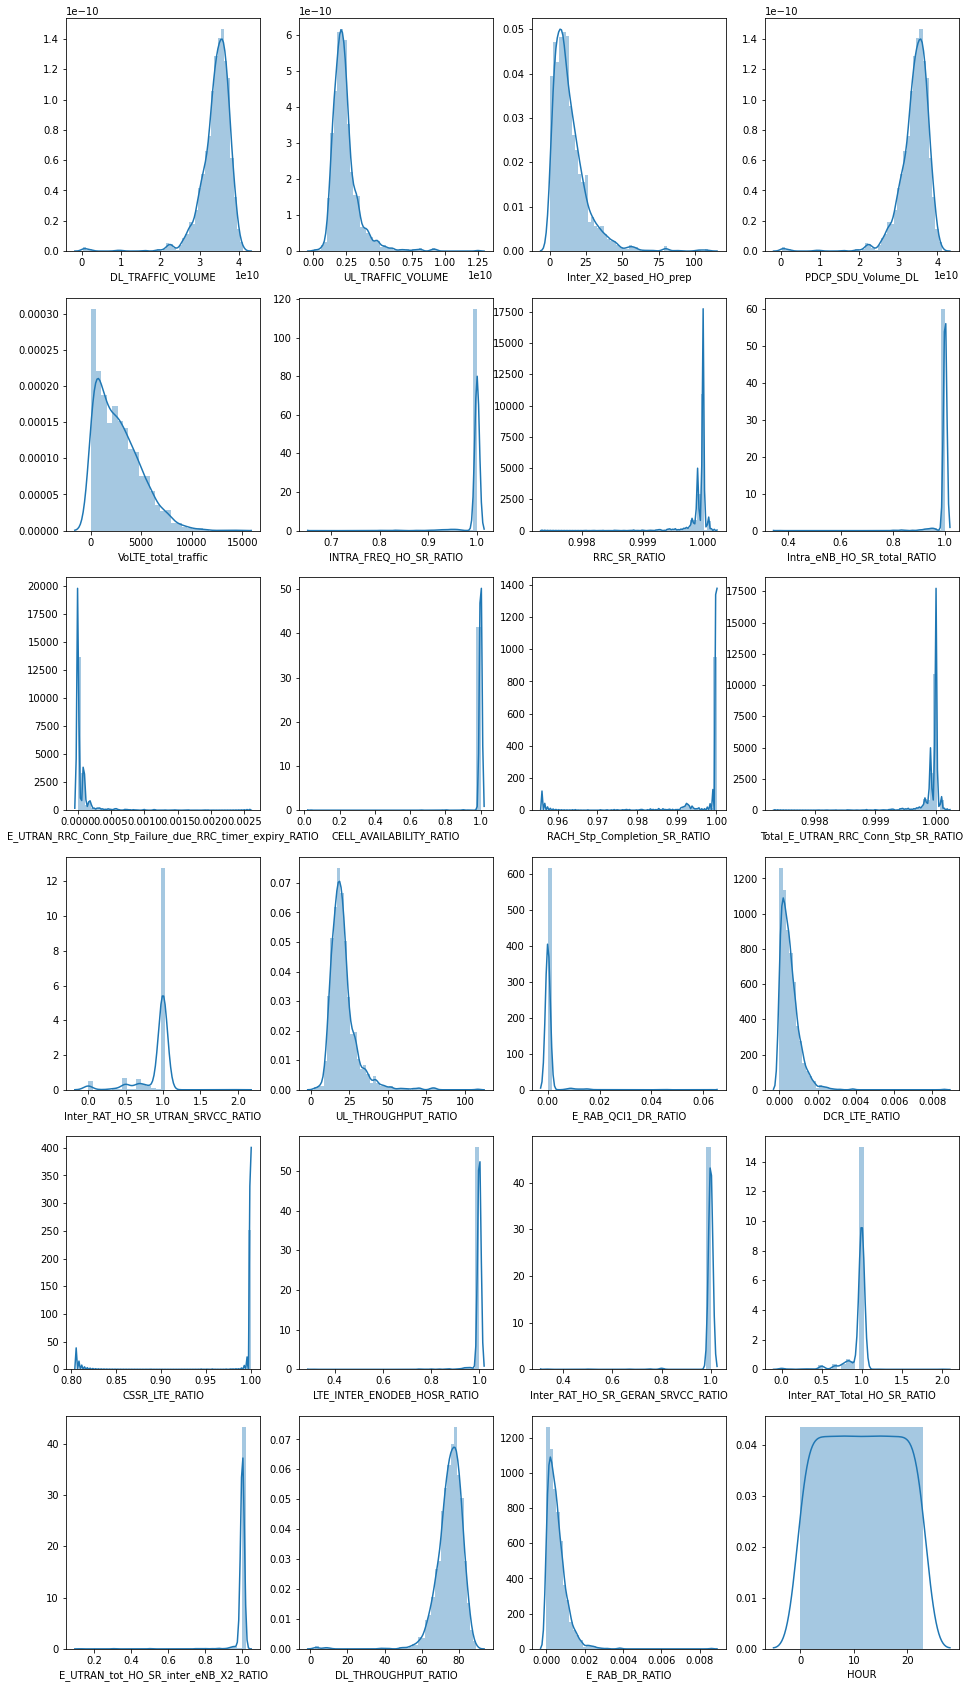






cell id : 9.10621795573706e+16


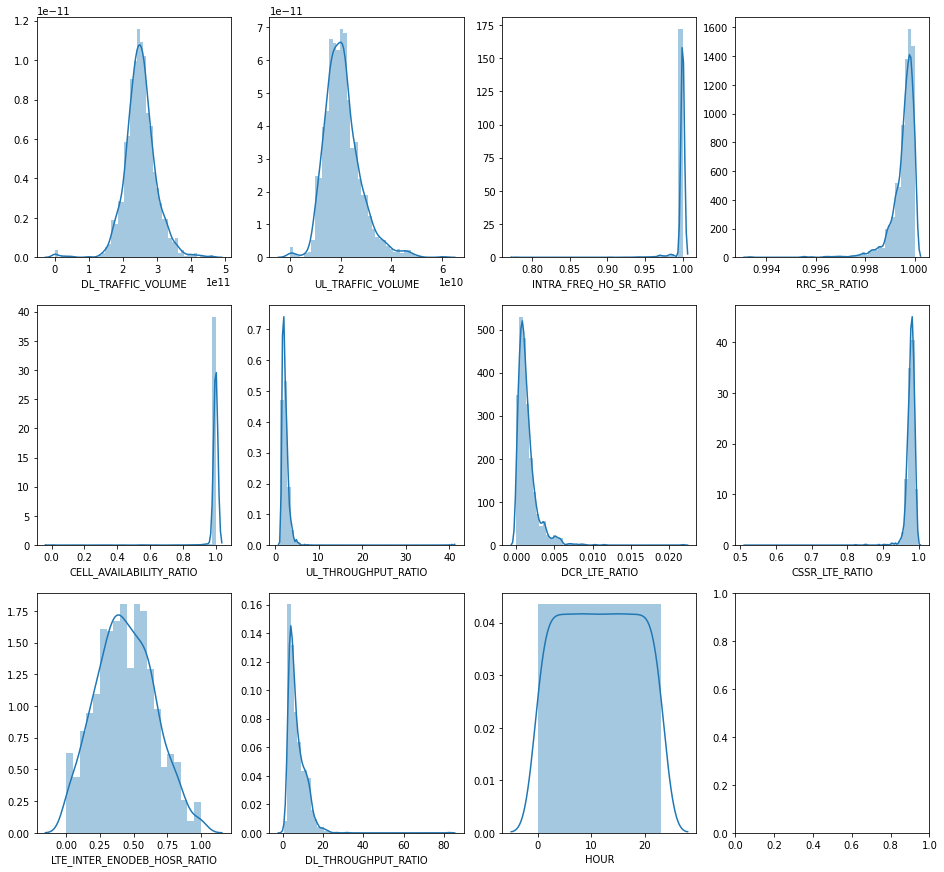






cell id : 3.8447326973958944e+17


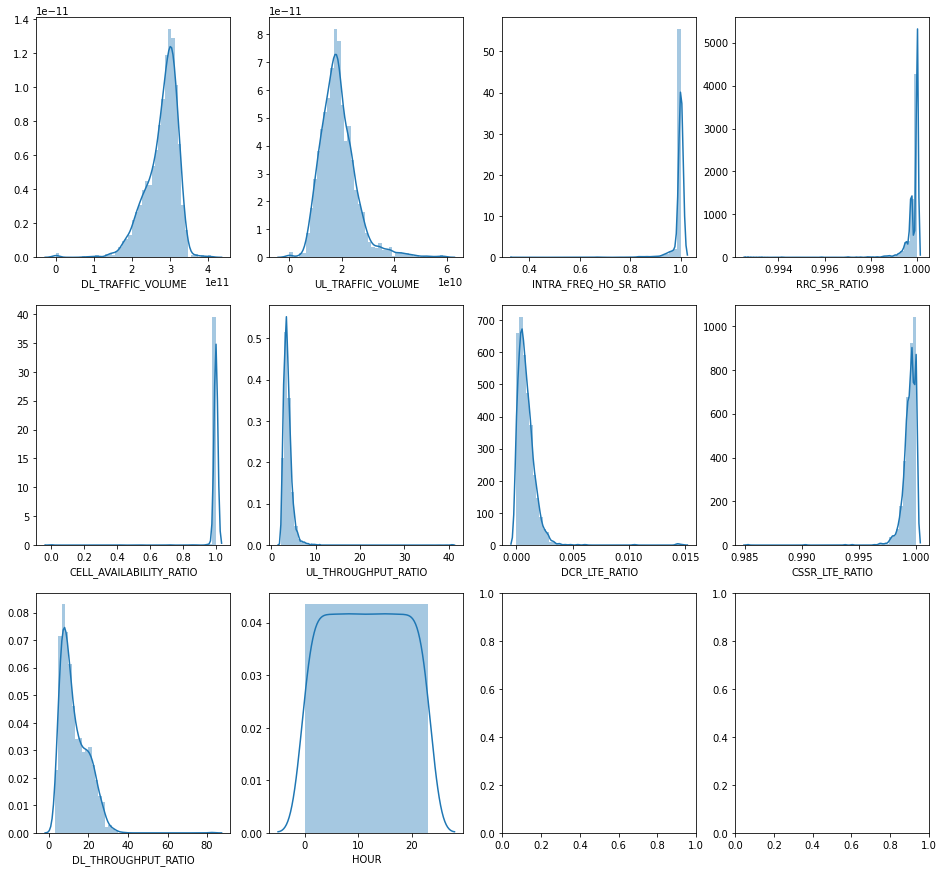






cell id : 4.262775046883192e+17


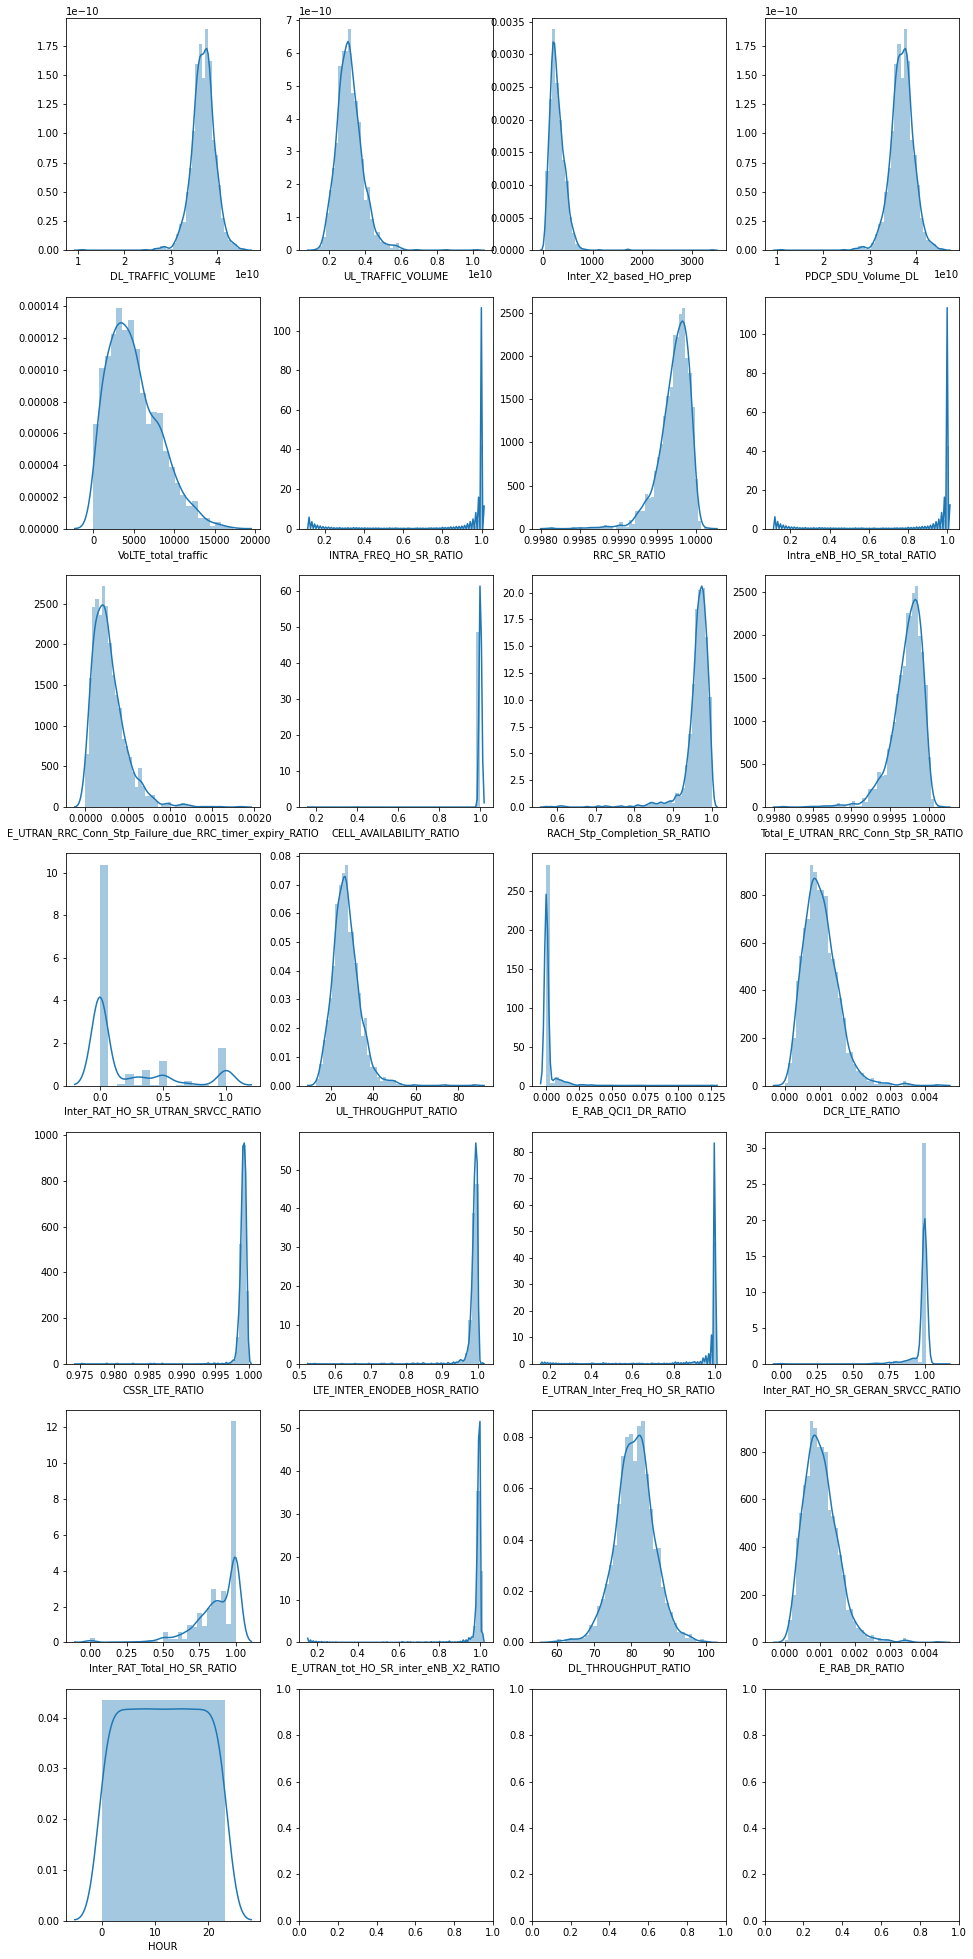

In [23]:
for df_cell in list_cells:
    print("="*100)
    print(f"cell id : {df_cell.cell_id.unique()[0]}")
    showFeatureDistribution(df_cell.drop(["index","cell_id"],axis=1))
    print("\n\n\n\n")

## 2.2 Drop highly correlated features

In [14]:
def RemoveHighlyRelevantFeatures(df,threshold=0.7):
    features = list(df.columns)
    features.remove('index')
    features.remove('cell_id')
    df_corr = df.corr()
    
    highCorr = collections.defaultdict(list)

    n = len(features)
    for i in range(n):
        for j in range(i+1,n):
            if abs(df_corr.loc[features[i],features[j]]) >= threshold:
                highCorr[features[i]].append(features[j])
    
    to_drop = list(highCorr.values())
    to_drop = set([item for sublist in to_drop for item in sublist])
    
    return df.drop(to_drop,axis=1)

<AxesSubplot:>

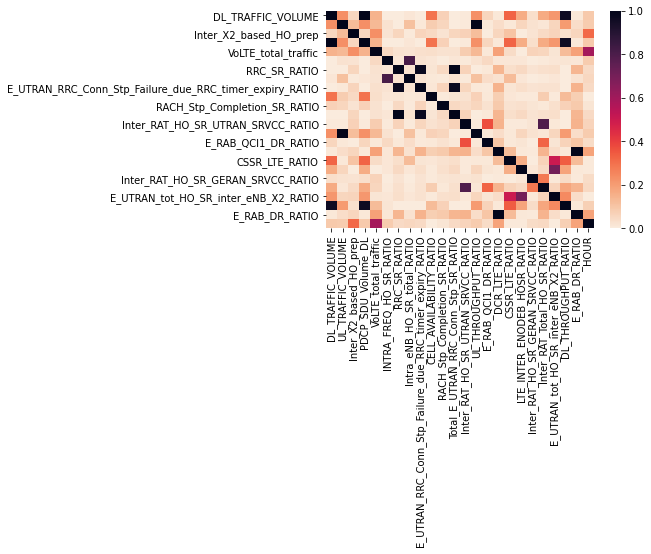

In [16]:
# Show the original correlation 
df_cell = list_cells[1]
df_cell_dr = df_cell.drop("cell_id",axis=1)
sns.heatmap(abs(df_cell_dr.corr()),vmax=1,vmin=0,cmap="rocket_r")

<AxesSubplot:>

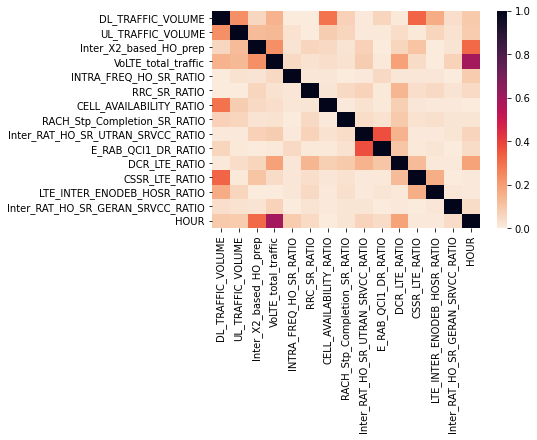

In [17]:
# show the correlation after drop 
df_cell_new = RemoveHighlyRelevantFeatures(df_cell)
sns.heatmap(abs(df_cell_new.corr()),vmax=1,vmin=0,cmap="rocket_r")

In [18]:
list_cells = list(map(RemoveLessRelevantFeatures,list_cells))

In [19]:
checkNullOfEach(list_cells)

Cell Id: 2.2265366483183206e+17
Number of features:16,	 Number of data: 1655
-  -  -  -  -  -  -  -  -  -  -  -  -  -  -  -  -  -  -  -  -  -  
index                                  0
DL_TRAFFIC_VOLUME                      1
UL_TRAFFIC_VOLUME                      1
Inter_X2_based_HO_prep                 1
VoLTE_total_traffic                    1
INTRA_FREQ_HO_SR_RATIO                 1
RRC_SR_RATIO                           1
CELL_AVAILABILITY_RATIO                1
RACH_Stp_Completion_SR_RATIO           1
Inter_RAT_HO_SR_UTRAN_SRVCC_RATIO    931
E_RAB_QCI1_DR_RATIO                    1
DCR_LTE_RATIO                          1
CSSR_LTE_RATIO                         1
LTE_INTER_ENODEB_HOSR_RATIO            3
Inter_RAT_HO_SR_GERAN_SRVCC_RATIO      5
HOUR                                   0
dtype: int64

Cell Id: 7.315874467898523e+16
Number of features:16,	 Number of data: 1656
-  -  -  -  -  -  -  -  -  -  -  -  -  -  -  -  -  -  -  -  -  -  
index                                  0
DL

# 3. Null values

cell id : 2.2265366483183206e+17


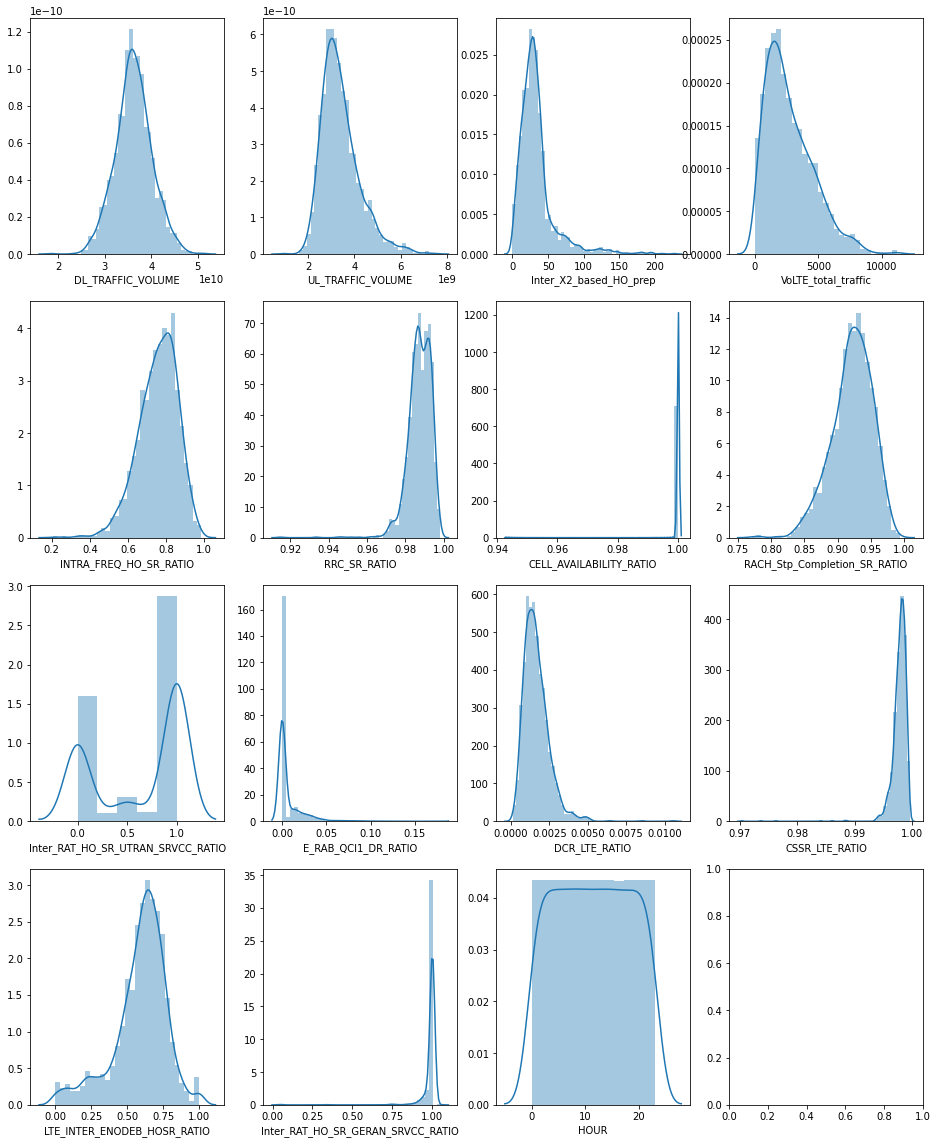






cell id : 7.315874467898523e+16


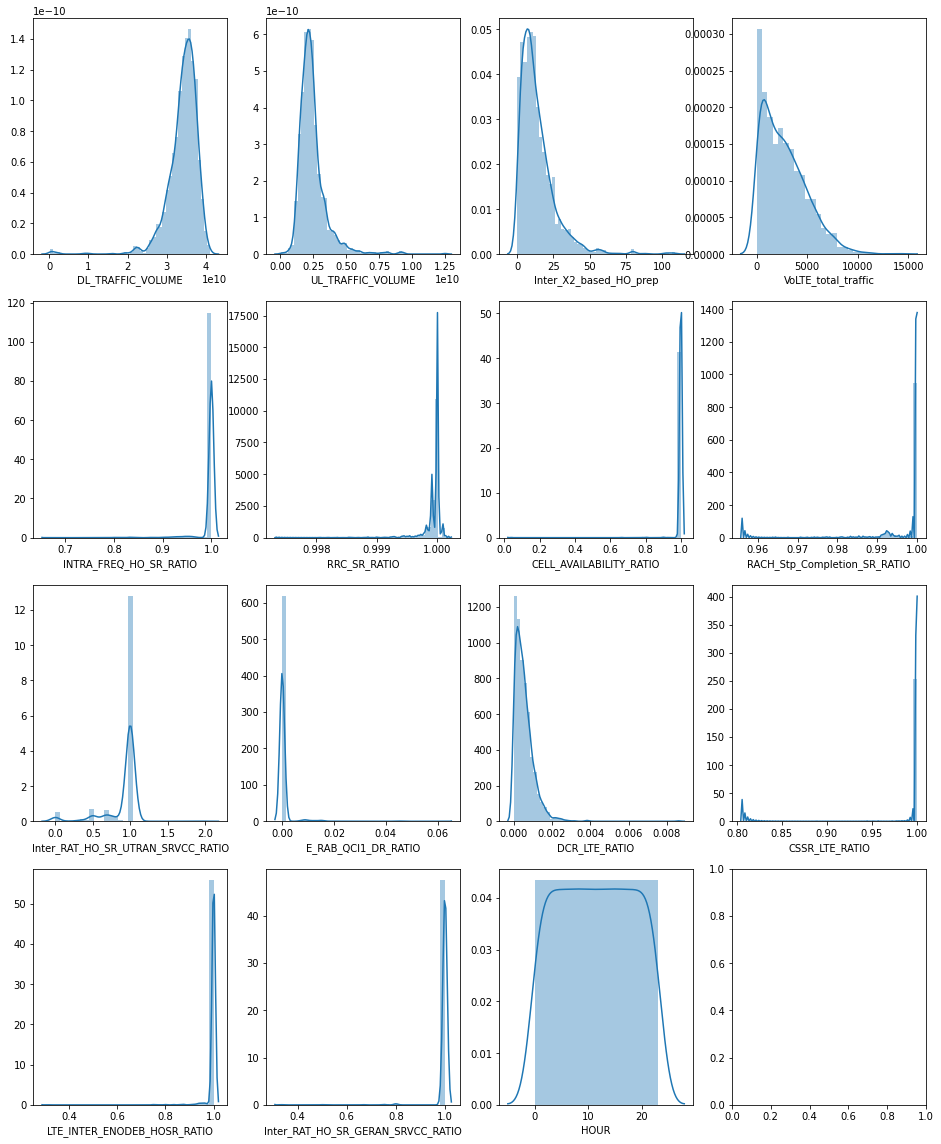






cell id : 9.10621795573706e+16


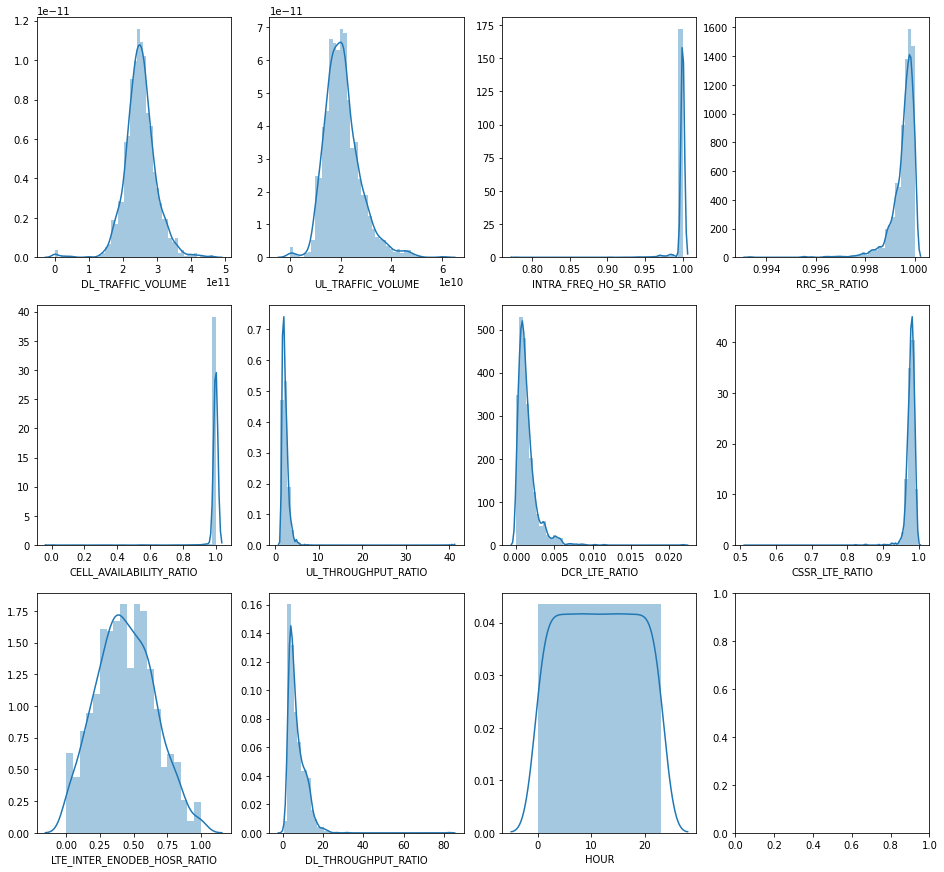






cell id : 3.8447326973958944e+17


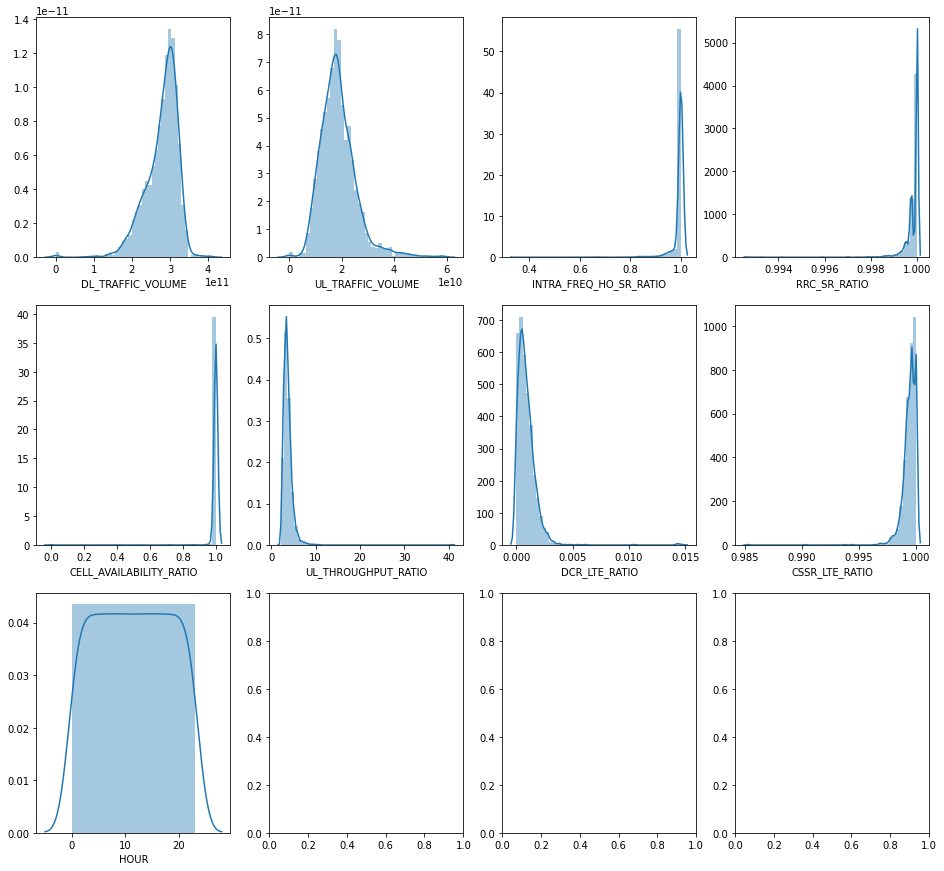






cell id : 4.262775046883192e+17


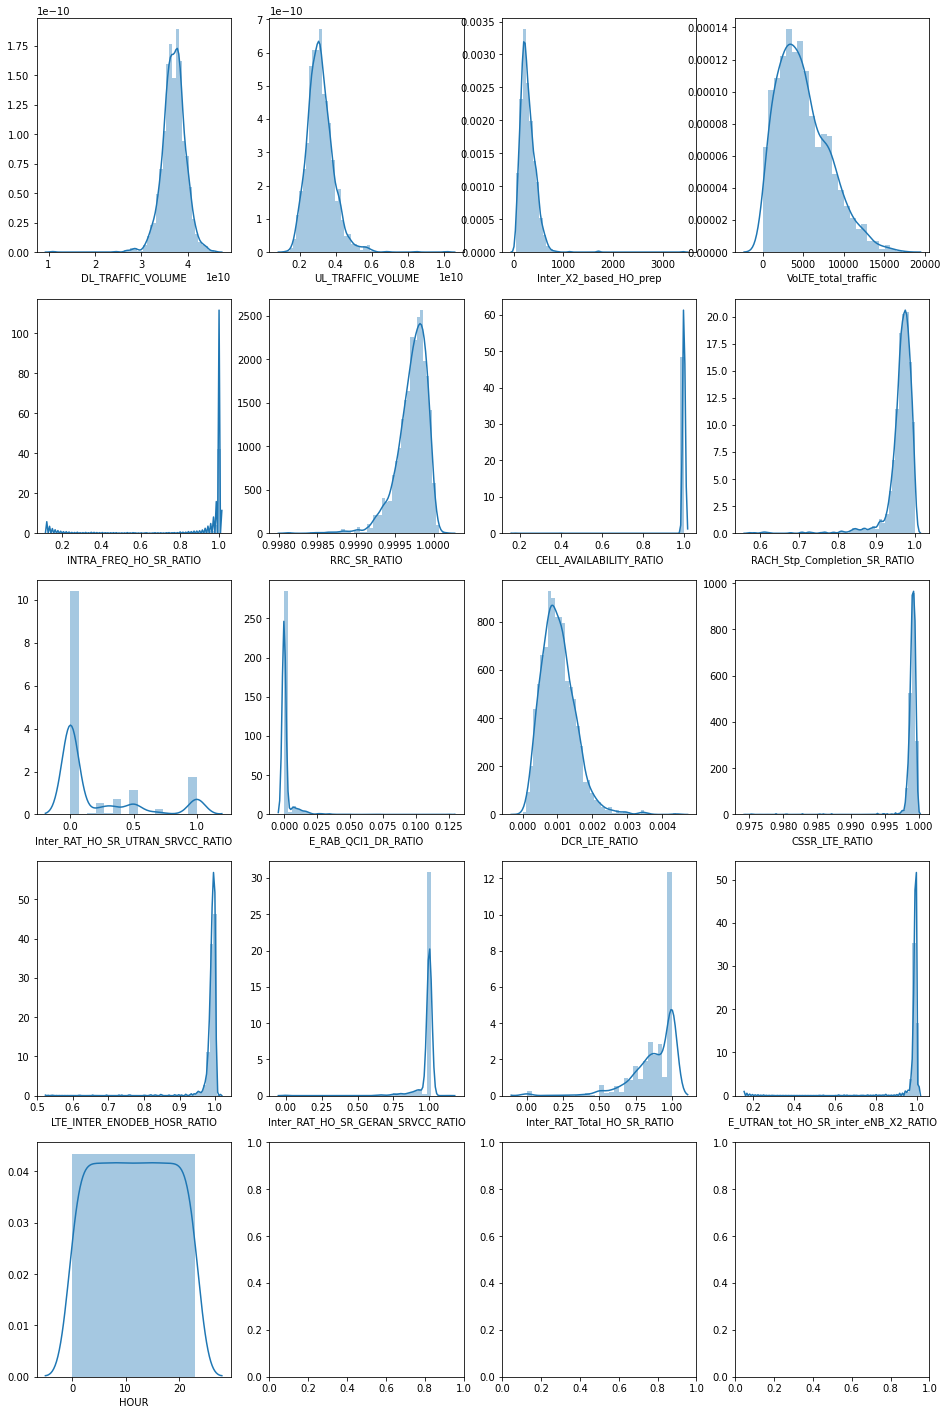

In [20]:
for df_cell in list_cells:
    print("="*100)
    print(f"cell id : {df_cell.cell_id.unique()[0]}")
    showFeatureDistribution(df_cell.drop(["index","cell_id"],axis=1))
    print("\n\n\n\n")

In [19]:
for df_cell in list_cells:
    cell_id = df_cell.cell_id.unique()[0]
    df_cell.fillna(df_cell.mean(),inplace=True)
    df_cell.to_csv(f"data/cells_reduced/cell_{cell_id}.csv",index=False)

In [27]:
pd.Series(cell_ids).to_csv("data/cells_reduced/cell_ids.csv",index=False,header=None)